Saving latent variables to uniprot ids and cleaning up...

In [ ]:
import pandas as pd

# Load the CSV files into pandas DataFrames
uniprot_ids = pd.read_csv('./results/latent_variables/seq_name_to_sequence.csv')
latent_vars = pd.read_csv('./results/latent_variables/CbbM(II)_latent_space.csv')

# Add 'Uniprot ID' column to latent_vars DataFrame
# Assuming the Uniprot IDs are in the same order as the latent variables
latent_vars['Uniprot ID'] = uniprot_ids['Uniprot ID']

# Merge the DataFrames on 'Uniprot ID'
merged_data = pd.merge(uniprot_ids, latent_vars, on='Uniprot ID')

In [ ]:
# Load the merged data and taxa CSV files into pandas DataFrames
taxa_data = pd.read_csv('./results/latent_variables/taxa.csv')

# Function to extract accession number from Uniprot ID
def extract_accession(uniprot_id):
    return uniprot_id.split('_')[-1].split('/')[0]

# Extract accession numbers from 'Uniprot ID' column in merged_data
merged_data['Accession.Number'] = merged_data['Uniprot ID'].apply(extract_accession)

# Merge merged_data with taxa_data based on 'Accession.Number'
final_data = pd.merge(merged_data, taxa_data, on='Accession.Number', how='left')

In [ ]:
#final_data.drop('Uniprot ID', axis=1, inplace=True)

#final_data.insert(0, 'Accession.Number', final_data.pop('Accession.Number'))

final_data.drop('Entry', axis=1, inplace=True)
final_data.drop('Gene.Names..primary.', axis=1, inplace=True)
final_data.drop('Gene.Names..synonym.', axis=1, inplace=True)
final_data.drop('Gene.Names..ordered.locus.', axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
final_data.to_csv('./results/latent_variables/merged_data.csv', index=False)

Creating graphs

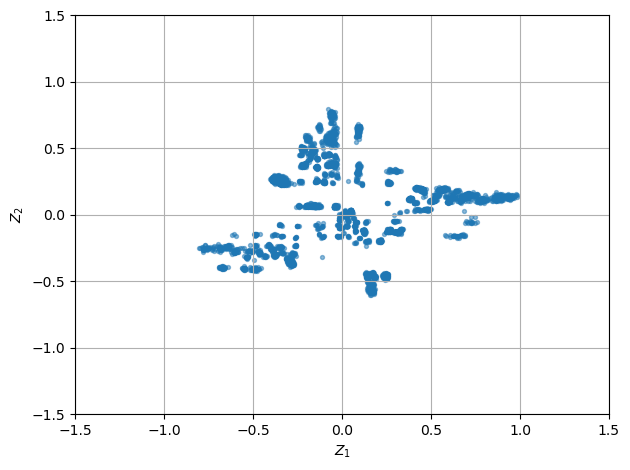

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("./results/latent_variables/merged_data.csv")

# Create a scatter plot
plt.figure(0)
plt.scatter(df['latent_variable_dim_1'], df['latent_variable_dim_2'], alpha=0.5, s=8)
plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.tight_layout()
plt.grid(True)
plt.show()

# Save or show the plot
#plt.savefig('./results/latent_variables/z_scatter_plot.png')  

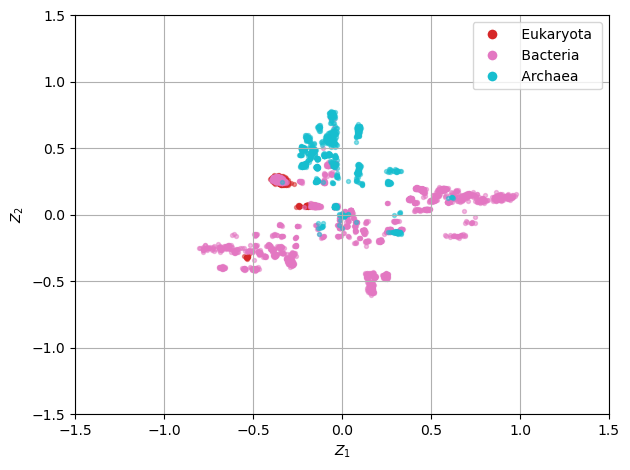

In [19]:
import numpy as np

# Extract 'superkingdom' information from 'Taxonomic.lineage' column
df['Superkingdom'] = df['Taxonomic.lineage'].str.extract(r'([\w\s]+)\s*\(\s*superkingdom\s*\)', expand=False)

# Get unique superkingdoms and assign colors
unique_superkingdoms = df['Superkingdom'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_superkingdoms))  # Choose a colormap and number of colors

# Create a dictionary to map superkingdoms to colors
superkingdom_color_map = {superkingdom: colors(i) for i, superkingdom in enumerate(unique_superkingdoms)}

# Create a scatter plot with different colors for each superkingdom
plt.figure(0)

for superkingdom, color in superkingdom_color_map.items():
    data = df[df['Superkingdom'] == superkingdom]
    plt.scatter(data['latent_variable_dim_1'], data['latent_variable_dim_2'], label=superkingdom, color=color, alpha=0.5, s=8)

# Create a legend with color indicators for each superkingdom excluding 'nan'
legend_handles = []
for superkingdom, color in superkingdom_color_map.items():
    if not pd.isnull(superkingdom):  # Exclude 'nan'
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=superkingdom, markersize=8, markerfacecolor=color))

plt.legend(handles=legend_handles, loc='best')

plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.tight_layout()
plt.grid(True)
plt.savefig('./results/latent_variables/superkingdom_scatter_plot.png')  

In [7]:
superkingdom_counts = df['Superkingdom'].value_counts()
print(superkingdom_counts)

 Eukaryota     3961
 Bacteria      3402
 Archaea       1042
Name: Superkingdom, dtype: int64


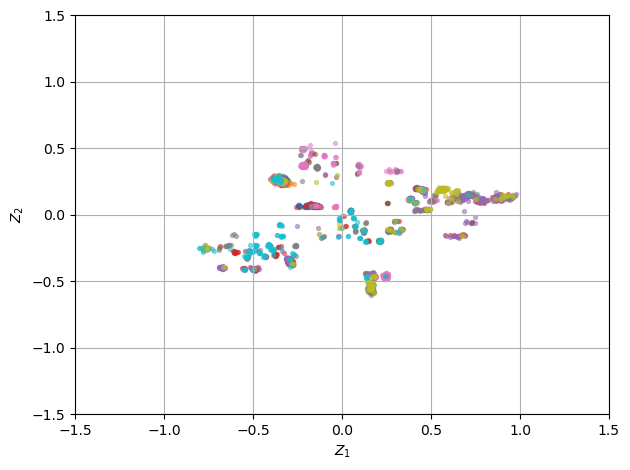

In [21]:

import numpy as np

# Extract 'superkingdom' information from 'Taxonomic.lineage' column
df['Family'] = df['Taxonomic.lineage'].str.extract(r'([\w\s]+)\s*\(\s*family\s*\)', expand=False)

# Get unique superkingdoms and assign colors
unique_families = df['Family'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_families))  # Choose a colormap and number of colors

# Create a dictionary to map superkingdoms to colors
family_color_map = {family: colors(i) for i, family in enumerate(unique_families)}

# Create a scatter plot with different colors for each superkingdom
plt.figure(0)

for family, color in family_color_map.items():
    data = df[df['Family'] == family]
    plt.scatter(data['latent_variable_dim_1'], data['latent_variable_dim_2'], label=family, color=color, alpha=0.5, s=8)


plt.xlim((-1.5,1.5))
plt.ylim((-1.5,1.5))
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.tight_layout()
plt.grid(True)
plt.show()
#plt.savefig('./results/latent_variables/superkingdom_scatter_plot.png') 


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Extract 'superkingdom' information from 'Taxonomic.lineage' column
df['Eukaryota'] = df['Taxonomic.lineage'].str.extract(r'([\w\s]+)\s*\(\s*superkingdom\s*\)', expand=False)

# Get unique superkingdoms and assign colors
unique_superkingdoms = df['Superkingdom'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_superkingdoms))  # Choose a colormap and number of colors

# Create a dictionary to map superkingdoms to colors
superkingdom_color_map = {superkingdom: colors(i) for i, superkingdom in enumerate(unique_superkingdoms)}

# Create a scatter plot with different colors for each superkingdom
plt.figure(0)

# Filter the dataframe for 'Eukaryota' superkingdom
eukaryota_data = df[df['Superkingdom'] == 'Eukaryota']

# Create a scatter plot for 'Eukaryota' superkingdom
plt.scatter(eukaryota_data['latent_variable_dim_1'], eukaryota_data['latent_variable_dim_2'],
            label='Eukaryota', color=superkingdom_color_map['Eukaryota'], alpha=0.5, s=8)

# Create a legend with color indicators for each superkingdom excluding 'nan'
legend_handles = []
for superkingdom, color in superkingdom_color_map.items():
    if not pd.isnull(superkingdom):  # Exclude 'nan'
        legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=superkingdom, markersize=8, markerfacecolor=color))

plt.legend(handles=legend_handles, loc='best')

plt.xlim((-1.5, 1.5))
plt.ylim((-1.5, 1.5))
plt.xlabel("$Z_1$")
plt.ylabel("$Z_2$")
plt.tight_layout()
plt.grid(True)
plt.savefig('./results/latent_variables/superkingdom_scatter_plot.png')
plt.show()


KeyError: 'Eukaryota'

<Figure size 640x480 with 0 Axes>